In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  178 non-null    object 
 1   Facebook              178 non-null    float64
 2   Pinterest             178 non-null    float64
 3   Twitter               178 non-null    float64
 4   StumbleUpon           178 non-null    float64
 5   YouTube               178 non-null    float64
 6   Instagram             178 non-null    float64
 7   Tumblr                178 non-null    float64
 8   reddit                178 non-null    float64
 9   VKontakte             178 non-null    float64
 10  LinkedIn              178 non-null    float64
 11  Google+               178 non-null    float64
 12  Digg                  178 non-null    float64
 13  MySpace               178 non-null    float64
 14  Fark                  178 non-null    float64
 15  NowPublic             1

In [3]:
df.head()

,Date,Facebook,Pinterest,Twitter,StumbleUpon,YouTube,Instagram,Tumblr,reddit,VKontakte,...,MySpace,Fark,NowPublic,iWiW,news.ycombinator.com,Delicious,orkut,Odnoklassniki,Vimeo,Other
0,2009-04,20.16,0.0,6.86,36.79,0.0,0.0,0.0,8.98,0.0,...,14.81,0.22,0.04,0.29,0.08,0.49,1.75,0.0,0.0,2.83
1,2009-05,24.30,0.0,9.95,33.78,0.0,0.0,0.0,7.62,0.0,...,8.95,0.44,0.05,2.10,0.12,0.57,1.77,0.0,0.0,2.72
2,2009-06,26.48,0.0,10.56,29.65,0.0,0.0,0.0,12.13,0.0,...,7.66,0.66,0.05,2.35,0.11,0.58,1.46,0.0,0.0,1.93
3,2009-07,29.10,0.0,10.35,33.55,0.0,0.0,0.0,9.52,0.0,...,5.49,0.22,0.03,2.21,0.14,0.55,1.24,0.0,0.0,1.84
4,2009-08,34.25,0.0,11.15,29.01,0.0,0.0,0.0,9.37,0.0,...,4.69,0.40,0.08,2.27,0.08,0.52,1.27,0.0,0.0,1.90


## Which Social media platform has had the highest percentage share on average across the entire period of time?

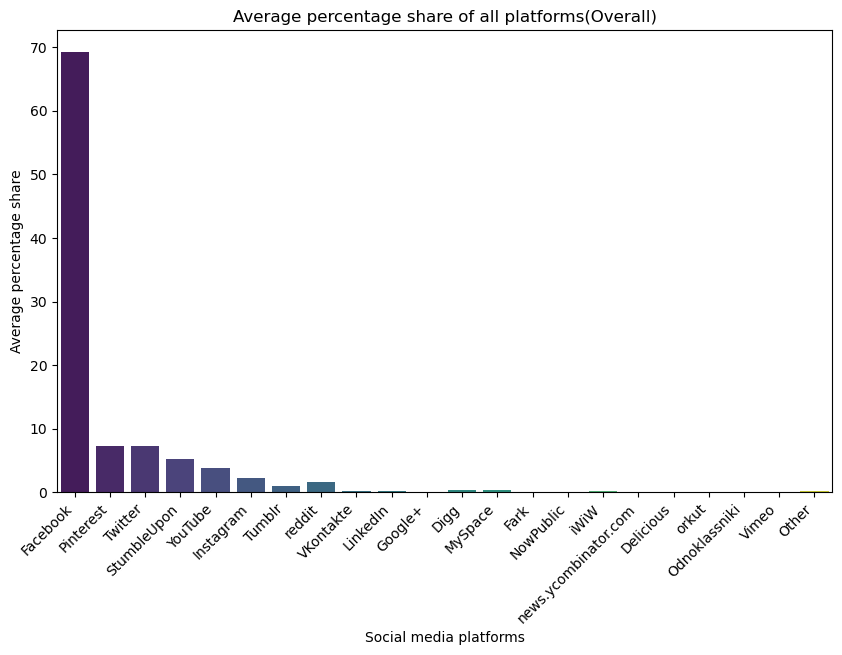

In [4]:
overall_avg_percentage_share=df.iloc[:, 1: ].mean().idxmax()
overall_avg_percentage=df.iloc[:, 1: ].mean().max()

plt.figure(figsize=(10,6))
sns.barplot(x=df.columns[1:], y=df.iloc[:, 1:].mean(), palette='viridis')
plt.title('Average percentage share of all platforms(Overall)')
plt.xlabel('Social media platforms')
plt.ylabel('Average percentage share')
plt.xticks(rotation=45,ha='right')
plt.show()

In [5]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  178 non-null    datetime64[ns]
 1   Facebook              178 non-null    float64       
 2   Pinterest             178 non-null    float64       
 3   Twitter               178 non-null    float64       
 4   StumbleUpon           178 non-null    float64       
 5   YouTube               178 non-null    float64       
 6   Instagram             178 non-null    float64       
 7   Tumblr                178 non-null    float64       
 8   reddit                178 non-null    float64       
 9   VKontakte             178 non-null    float64       
 10  LinkedIn              178 non-null    float64       
 11  Google+               178 non-null    float64       
 12  Digg                  178 non-null    float64       
 13  MySpace             

In [6]:
df['Yearly']=df['Date'].dt.to_period('Y')


In [7]:
feature=df.drop(columns=['Date','Yearly'])
feature=feature.columns
yearly=df.groupby('Yearly')[feature].mean().reset_index()
yearly['Yearly']=yearly['Yearly'].dt.to_timestamp()
yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Yearly                15 non-null     datetime64[ns]
 1   Facebook              15 non-null     float64       
 2   Pinterest             15 non-null     float64       
 3   Twitter               15 non-null     float64       
 4   StumbleUpon           15 non-null     float64       
 5   YouTube               15 non-null     float64       
 6   Instagram             15 non-null     float64       
 7   Tumblr                15 non-null     float64       
 8   reddit                15 non-null     float64       
 9   VKontakte             15 non-null     float64       
 10  LinkedIn              15 non-null     float64       
 11  Google+               15 non-null     float64       
 12  Digg                  15 non-null     float64       
 13  MySpace               

In [8]:
yearly.head()

,Yearly,Facebook,Pinterest,Twitter,StumbleUpon,YouTube,Instagram,Tumblr,reddit,VKontakte,...,MySpace,Fark,NowPublic,iWiW,news.ycombinator.com,Delicious,orkut,Odnoklassniki,Vimeo,Other
0,2009-01-01,33.856000,0.000000,7.809000,24.579000,2.431000,0.0,0.000000,6.534000,0.000000,...,5.238000,0.287000,0.073000,1.527000,0.081000,0.408000,1.071000,0.000000,0.008000,1.602000
1,2010-01-01,59.369167,0.000000,6.400833,18.790000,6.475833,0.0,0.000000,3.284167,0.000000,...,1.273333,0.245000,0.631667,0.538333,0.090833,0.276667,0.267500,0.000000,0.105000,0.453333
2,2011-01-01,65.432500,0.000000,4.516667,20.738333,5.318333,0.0,0.000000,2.353333,0.150000,...,0.049167,0.127500,0.218333,0.040833,0.059167,0.084167,0.061667,0.011667,0.022500,0.192500
3,2012-01-01,65.247500,7.261667,6.573333,8.814167,7.482500,0.0,0.000000,3.230833,0.347500,...,0.012500,0.103333,0.176667,0.013333,0.065833,0.031667,0.020833,0.039167,0.031667,0.114167
4,2013-01-01,66.210000,11.196667,9.840000,4.306667,3.062500,0.0,1.679167,2.553333,0.354167,...,0.004167,0.081667,0.081667,0.000833,0.012500,0.005000,0.007500,0.097500,0.021667,0.037500


In [9]:
stats_yearly=yearly.describe()
stats_yearly=pd.DataFrame(stats_yearly).reset_index()

stats_yearly

,index,Facebook,Pinterest,Twitter,StumbleUpon,YouTube,Instagram,Tumblr,reddit,VKontakte,...,MySpace,Fark,NowPublic,iWiW,news.ycombinator.com,Delicious,orkut,Odnoklassniki,Vimeo,Other
0,count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
1,mean,68.817233,7.227222,7.272767,5.392433,3.752900,2.154111,0.968167,1.720711,0.180167,...,0.438589,0.071411,0.078756,0.141356,0.030511,0.054033,0.095233,0.013389,0.015700,0.165856
2,std,12.266981,4.501844,1.969008,8.668927,2.329483,3.408936,1.434397,1.677120,0.110626,...,1.367354,0.086716,0.168363,0.407401,0.028527,0.121700,0.278625,0.028339,0.026550,0.415089
3,min,33.856000,0.000000,4.260000,0.000000,0.116667,0.000000,0.000000,0.341667,0.000000,...,0.000000,0.012500,0.000000,0.000000,0.006667,0.000000,0.000000,0.000000,0.000000,0.000000
4,25%,65.675417,6.095417,5.860000,0.007083,2.058833,0.000000,0.110417,0.609583,0.116667,...,0.000000,0.019167,0.000000,0.000000,0.011667,0.000000,0.000000,0.000000,0.001667,0.005417
5,50%,68.953333,7.261667,7.349167,0.430000,4.112500,0.080000,0.556667,0.788333,0.174167,...,0.000000,0.028333,0.000000,0.000000,0.015000,0.000000,0.000000,0.000000,0.008000,0.013333
6,75%,72.708750,10.364583,8.567500,6.560417,5.076250,3.347083,1.162500,2.453333,0.243333,...,0.008333,0.092500,0.077333,0.007083,0.043333,0.018333,0.014167,0.005833,0.019167,0.075833
7,max,86.141667,13.976667,10.172500,24.579000,7.482500,11.920000,5.629167,6.534000,0.354167,...,5.238000,0.287000,0.631667,1.527000,0.090833,0.408000,1.071000,0.097500,0.105000,1.602000


In [10]:
stats_yearly=stats_yearly[stats_yearly['index']=='mean']
stats_yearly

,index,Facebook,Pinterest,Twitter,StumbleUpon,YouTube,Instagram,Tumblr,reddit,VKontakte,...,MySpace,Fark,NowPublic,iWiW,news.ycombinator.com,Delicious,orkut,Odnoklassniki,Vimeo,Other
1,mean,68.817233,7.227222,7.272767,5.392433,3.7529,2.154111,0.968167,1.720711,0.180167,...,0.438589,0.071411,0.078756,0.141356,0.030511,0.054033,0.095233,0.013389,0.0157,0.165856


In [11]:
transposed_df=np.transpose(stats_yearly)
transposed_df

,1
index,mean
Facebook,68.817233
Pinterest,7.227222
Twitter,7.272767
StumbleUpon,5.392433
YouTube,3.7529
Instagram,2.154111
Tumblr,0.968167
reddit,1.720711
VKontakte,0.180167


In [12]:
new_df = pd.DataFrame(transposed_df)
new_df = new_df.rename(columns=new_df.iloc[0]).reset_index()
new_df=new_df.drop(0)
new_df

,index,mean
1,Facebook,68.817233
2,Pinterest,7.227222
3,Twitter,7.272767
4,StumbleUpon,5.392433
5,YouTube,3.7529
6,Instagram,2.154111
7,Tumblr,0.968167
8,reddit,1.720711
9,VKontakte,0.180167
10,LinkedIn,0.224867


In [13]:
threshold = 5.0
new_df.loc[new_df['mean'] < threshold, 'index'] = 'Other'
df_treshold = new_df.groupby('index', as_index=False).sum()

(-1.0999982094191505,
 1.0999998824317416,
 -1.0999994019409995,
 1.0999999599042134)

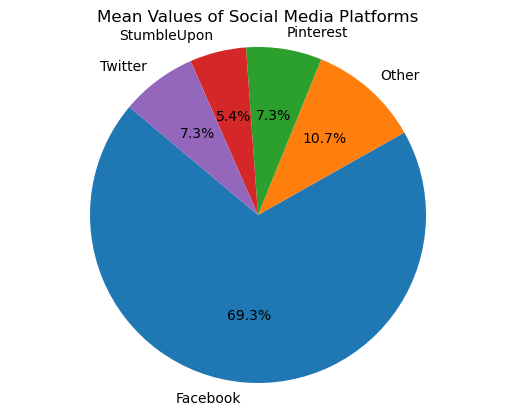

In [14]:
plt.pie(df_treshold['mean'], labels=df_treshold['index'], autopct='%1.1f%%', startangle=140)
plt.title('Mean Values of Social Media Platforms')
plt.axis('equal')

In [15]:
top_five=new_df.sort_values(by='mean',ascending=False)
top_five=top_five[:5].reset_index(drop=True)
top_five

,index,mean
0,Facebook,68.817233
1,Twitter,7.272767
2,Pinterest,7.227222
3,StumbleUpon,5.392433
4,Other,3.7529


Text(0.5, 1.0, 'Rangking of Social Media Popularity')

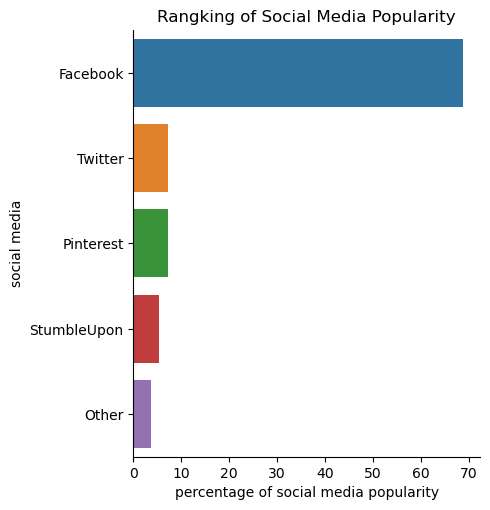

In [16]:
sns.catplot(data=top_five,x='mean',y='index',kind='bar')
plt.xlabel('percentage of social media popularity')
plt.ylabel('social media')
plt.title('Rangking of Social Media Popularity')

In [17]:
selected_columns = yearly.columns[yearly.columns.isin(top_five['index'])]
time_df=yearly[selected_columns]
time_df['Year']=yearly['Yearly']
time_df

C:\Users\aryxn\AppData\Local\Temp\ipykernel_19192\3579478855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['Year']=yearly['Yearly']


,Facebook,Pinterest,Twitter,StumbleUpon,Other,Year
0,33.856000,0.000000,7.809000,24.579000,1.602000,2009-01-01
1,59.369167,0.000000,6.400833,18.790000,0.453333,2010-01-01
2,65.432500,0.000000,4.516667,20.738333,0.192500,2011-01-01
3,65.247500,7.261667,6.573333,8.814167,0.114167,2012-01-01
4,66.210000,11.196667,9.840000,4.306667,0.037500,2013-01-01
5,72.423333,9.532500,6.906667,1.944167,0.013333,2014-01-01
6,83.429167,6.617500,5.319167,0.845833,0.004167,2015-01-01
7,86.141667,6.114167,4.260000,0.430000,0.000000,2016-01-01
8,82.875000,7.612500,4.825833,0.263333,0.015833,2017-01-01
9,67.835833,13.285833,7.349167,0.150833,0.026667,2018-01-01


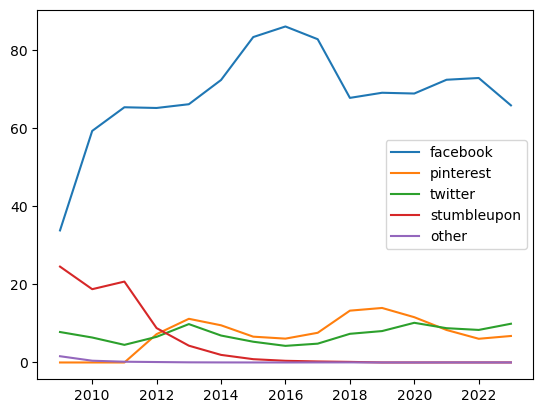

In [18]:
plt.plot(time_df['Year'],time_df['Facebook'],label='facebook')
plt.plot(time_df['Year'],time_df['Pinterest'],label='pinterest')
plt.plot(time_df['Year'],time_df['Twitter'],label='twitter')
plt.plot(time_df['Year'],time_df['StumbleUpon'],label='stumbleupon')
plt.plot(time_df['Year'],time_df['Other'],label='other')
plt.legend()

## How has popularity of Facebook changed over-time

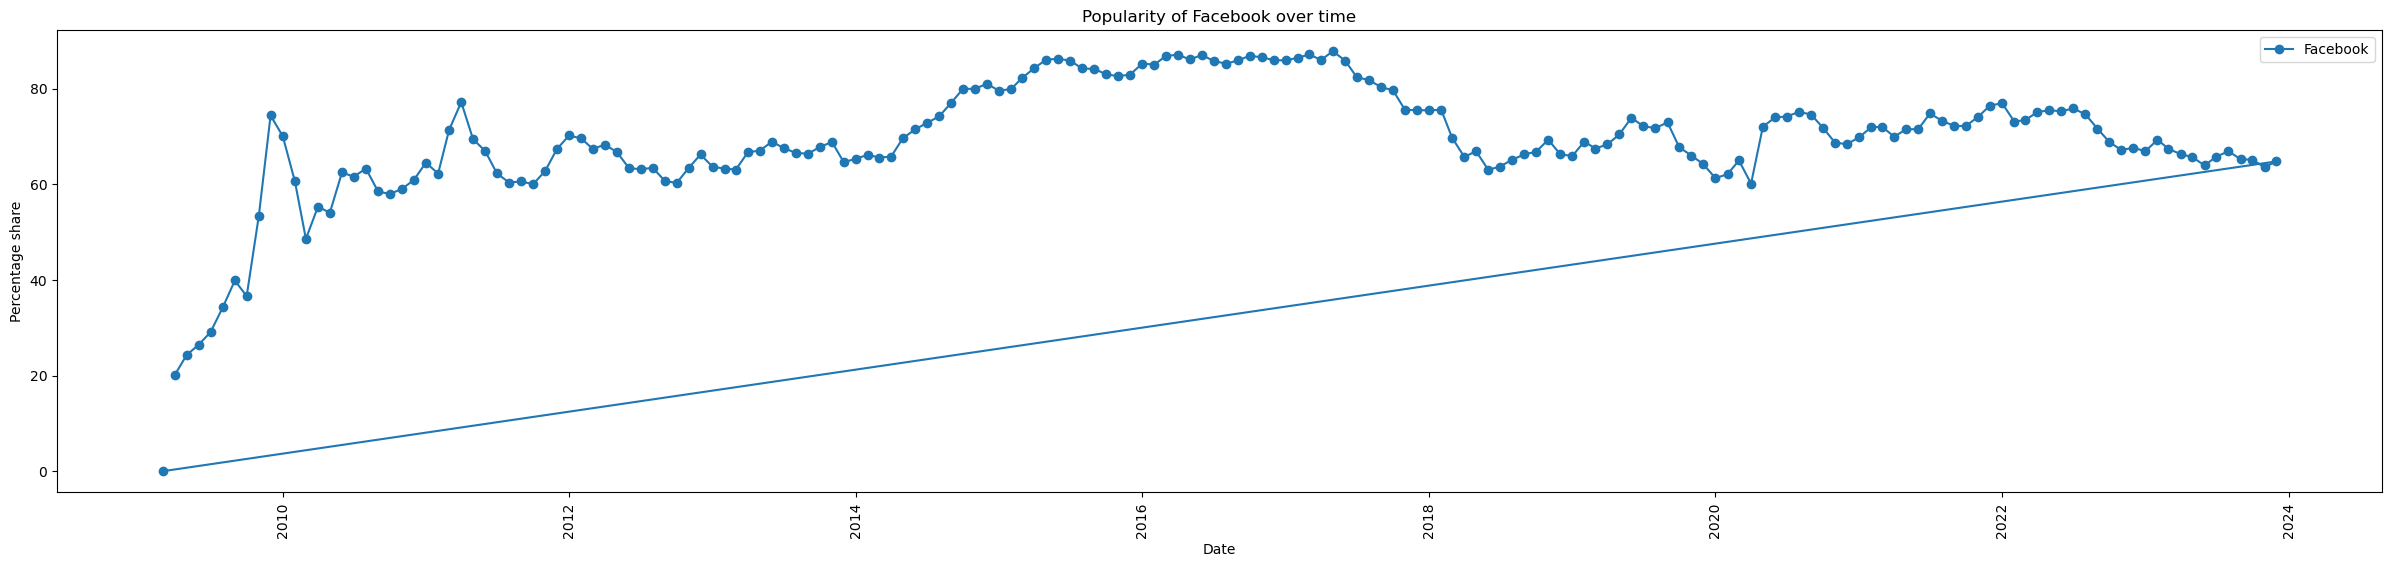

In [19]:
plt.figure(figsize=(30,6))
plt.plot(df['Date'],df['Facebook'],label='Facebook',marker='o')
plt.title('Popularity of Facebook over time')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Percentage share')
plt.legend()
plt.show()

## Evolution of YouTube over time

C:\Users\aryxn\AppData\Local\Temp\ipykernel_19192\2464751555.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(df['Date'],df.iloc[:, 1 :].sum(axis=1) - df['YouTube'],label='Other Platforms', marker='o',linestyle='-',color='orange')


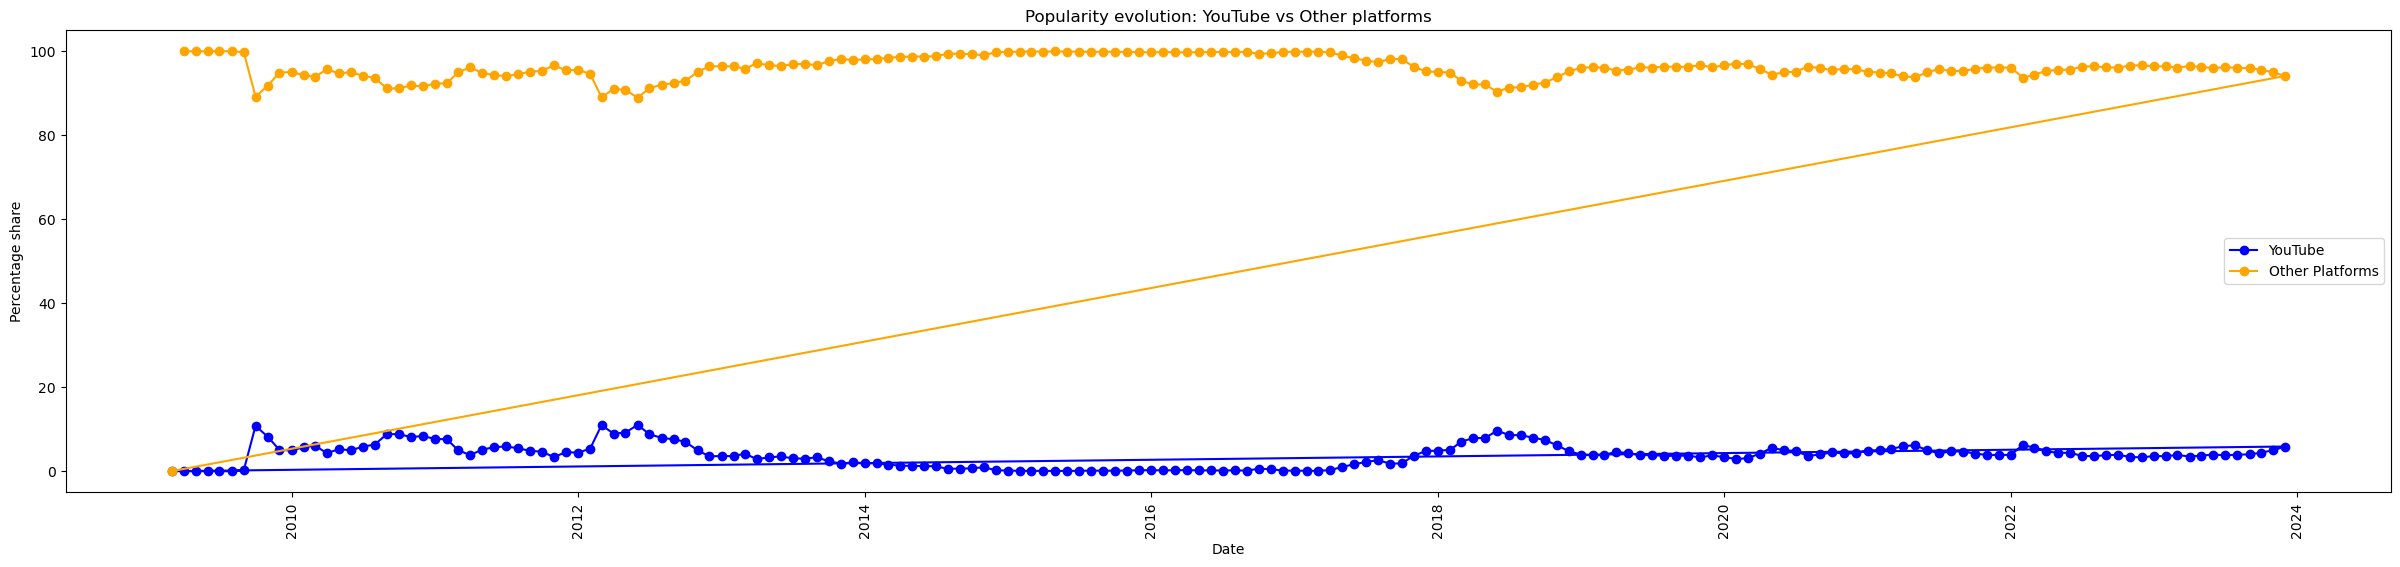

In [20]:
plt.figure(figsize=(30,6))
plt.plot(df['Date'],df['YouTube'],label='YouTube',marker='o',linestyle='-',color='blue')
plt.plot(df['Date'],df.iloc[:, 1 :].sum(axis=1) - df['YouTube'],label='Other Platforms', marker='o',linestyle='-',color='orange')
plt.title('Popularity evolution: YouTube vs Other platforms')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Percentage share')
plt.legend()
plt.show()

Based on the analysis of social media popularity from 2009 to 2023, several insights can be drawn:

1. Dominant Platforms:

    * Facebook: Facebook consistently stands out as the most popular social media platform throughout the years, with a mean popularity of 68.82%. It has maintained a significant lead over other platforms.
    * Twitter and Pinterest: Twitter and Pinterest also have noticeable popularity, with mean values of 7.27% and 7.23%, respectively.
2. Platform Trends Over Time:

    * Facebook's Stability: Facebook's popularity has remained consistently high over the years, with a slight decline in recent years.
    * Emergence of Other Platforms: The "Other" category, representing the combined popularity of various smaller platforms, has seen an increase over time, reaching 3.75% in recent years.
3. Top 5 Platforms:

    * The top five social media platforms in terms of popularity are Facebook, Twitter, Pinterest, StumbleUpon, and the "Other" category.
4. Evolution of Popularity:

    * Facebook's Rise and Stability: Facebook's popularity increased in the initial years, stabilized, and then experienced a slight decline in recent years.
    * Twitter and Pinterest: Twitter and Pinterest showed relatively stable trends over the years, with some fluctuations.
5. Platform Popularity Threshold:

    * A popularity threshold of 5.0% was used to categorize platforms into "Other" if their mean popularity was below this threshold. This helps focus on the major platforms for analysis.
6. Insights from Plots:

    * The pie chart visualizes the distribution of mean popularity among major platforms, highlighting Facebook's dominance.
    * The bar chart ranks the top five platforms, reinforcing Facebook's lead and showcasing the relative positions of Twitter, Pinterest, StumbleUpon, and the "Other" category.
7. Time Series Analysis:

    * The line plot over time reveals the popularity trends of Facebook, Pinterest, Twitter, StumbleUpon, and the "Other" category. It shows how Facebook has consistently been the most popular, while the "Other" category has gained traction in recent years.
In summary, Facebook has been a dominant force in the social media landscape over the years, with a stable and high level of popularity. While other platforms like Twitter and Pinterest have also maintained notable popularity, the emergence of various smaller platforms contributes to the overall diversity of the social media landscape.